In [111]:
import pandas as pd
import numpy as np

In [112]:
sales_df = pd.read_csv('sales.csv')

In [113]:
stock_levels_df = pd.read_csv('sensor_stock_levels.csv')

In [114]:
storage_temperature_df = pd.read_csv('sensor_storage_temperature.csv')

In [115]:
sales_df.drop(columns=['Unnamed: 0'], inplace=True)

In [116]:
stock_levels_df.drop(columns=['Unnamed: 0'], inplace=True)

In [117]:
storage_temperature_df.drop(columns=['Unnamed: 0'], inplace=True)

In [118]:
sales_df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [119]:
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])

In [120]:
sales_df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

In [121]:
stock_levels_df.dtypes

id                      object
timestamp               object
product_id              object
estimated_stock_pct    float64
dtype: object

In [122]:
stock_levels_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [123]:
stock_levels_df['timestamp'] = pd.to_datetime(stock_levels_df['timestamp'])

In [124]:
storage_temperature_df.dtypes

id              object
timestamp       object
temperature    float64
dtype: object

In [125]:
storage_temperature_df['timestamp'] = pd.to_datetime(storage_temperature_df['timestamp'])

In [126]:
storage_temperature_df.dtypes

id                     object
timestamp      datetime64[ns]
temperature           float64
dtype: object

In [127]:
#Let's check for missing values
sales_df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [128]:
storage_temperature_df.isnull().sum()

id             0
timestamp      0
temperature    0
dtype: int64

In [129]:
stock_levels_df.isnull().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [130]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [131]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')

stock_levels_df = convert_timestamp_to_hourly(stock_levels_df, 'timestamp')

storage_temperature_df = convert_timestamp_to_hourly(storage_temperature_df, 'timestamp')

In [132]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()

In [133]:
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [134]:
stock_agg = stock_levels_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()

In [135]:
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [136]:
temp_agg = storage_temperature_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()

In [137]:
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


In [138]:
merge_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')

In [139]:
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [140]:
merge_df = merge_df.merge(temp_agg, on=['timestamp'], how='left')
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [141]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


In [142]:
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [143]:
merge_df['quantity'] = merge_df['quantity'].fillna(0)

In [144]:
product_categories_df = sales_df[['product_id', 'category']]
product_categories_df = product_categories_df.drop_duplicates()

In [145]:
product_price_df = sales_df[['product_id', 'unit_price']]
product_price_df = product_price_df.drop_duplicates()

In [146]:
merge_df = merge_df.merge(product_categories_df, on='product_id', how='left')

In [147]:
merge_df = merge_df.merge(product_price_df, on="product_id", how="left")
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [148]:
#Feature engineering

In [149]:
merge_df['day_of_month'] = merge_df['timestamp'].dt.day
merge_df['day_of_week'] = merge_df['timestamp'].dt.dayofweek
merge_df['hour'] = merge_df['timestamp'].dt.hour
merge_df.drop(columns=['timestamp'], inplace=True)
merge_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,day_of_month,day_of_week,hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [152]:
merge_df['category'] = merge_df['category'].astype(float)

ValueError: could not convert string to float: 'kitchen'

In [151]:
merge_df.dtypes

product_id              object
estimated_stock_pct    float64
quantity               float64
temperature            float64
category                object
unit_price             float64
day_of_month             int32
day_of_week              int32
hour                     int32
dtype: object

In [158]:
merge_df.replace({'False': 0, 'True': 1})

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850,8.19,1,1,9,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077,4.99,7,0,19,False,False,...,False,False,False,False,False,False,False,False,False,False
10841,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077,19.99,7,0,19,False,False,...,True,False,False,False,False,False,False,False,False,False
10842,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077,6.99,7,0,19,False,False,...,False,False,True,False,False,False,False,False,False,False
10843,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,14.99,7,0,19,False,False,...,True,False,False,False,False,False,False,False,False,False


In [159]:
merge_df.dtypes

product_id                         object
estimated_stock_pct               float64
quantity                          float64
temperature                       float64
unit_price                        float64
day_of_month                        int32
day_of_week                         int32
hour                                int32
category_baby products               bool
category_baked goods                 bool
category_baking                      bool
category_beverages                   bool
category_canned foods                bool
category_cheese                      bool
category_cleaning products           bool
category_condiments and sauces       bool
category_dairy                       bool
category_frozen                      bool
category_fruit                       bool
category_kitchen                     bool
category_meat                        bool
category_medicine                    bool
category_packaged foods              bool
category_personal care            

In [162]:
merge_df['category_baby products'].astype(int)

0        0
1        0
2        1
3        0
4        0
        ..
10840    0
10841    0
10842    0
10843    0
10844    0
Name: category_baby products, Length: 10845, dtype: int32

In [ ]:
merge_df[['category_baked goods', 'category_baking', 'category_beverages', ]].astype(int)

In [163]:
merge_df.dtypes

product_id                         object
estimated_stock_pct               float64
quantity                          float64
temperature                       float64
unit_price                        float64
day_of_month                        int32
day_of_week                         int32
hour                                int32
category_baby products               bool
category_baked goods                 bool
category_baking                      bool
category_beverages                   bool
category_canned foods                bool
category_cheese                      bool
category_cleaning products           bool
category_condiments and sauces       bool
category_dairy                       bool
category_frozen                      bool
category_fruit                       bool
category_kitchen                     bool
category_meat                        bool
category_medicine                    bool
category_packaged foods              bool
category_personal care            

In [167]:
boolean_columns = [
    'category_baby products',
    'category_baked goods',
    'category_baking',
    'category_beverages',
    'category_canned foods',
    'category_cheese',
    'category_cleaning products',
    'category_condiments and sauces',
    'category_dairy',
    'category_frozen',
    'category_fruit',
    'category_kitchen',
    'category_meat',
    'category_medicine',
    'category_packaged foods',
    'category_personal care',
    'category_pets',
    'category_refrigerated items',
    'category_seafood',
    'category_snacks',
    'category_spices and herbs',
    'category_vegetables'
]

In [168]:
# Convert boolean columns to integer values
for column in boolean_columns:
    merge_df[column] = merge_df[column].astype(int)

In [169]:
merge_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,day_of_month,day_of_week,hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [170]:
merge_df.drop(columns=['product_id'], inplace=True)

In [171]:
#Modeling

X = merge_df.drop(columns=['estimated_stock_pct'])
y = merge_df['estimated_stock_pct']

print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [172]:
K = 10
split = 0.75

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [174]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.237
Fold 2: MAE = 0.236
Fold 3: MAE = 0.237
Fold 4: MAE = 0.236
Fold 5: MAE = 0.236
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.237
Fold 9: MAE = 0.236
Fold 10: MAE = 0.237
Average MAE: 0.24


In [175]:
import matplotlib.pyplot as plt
import numpy as np

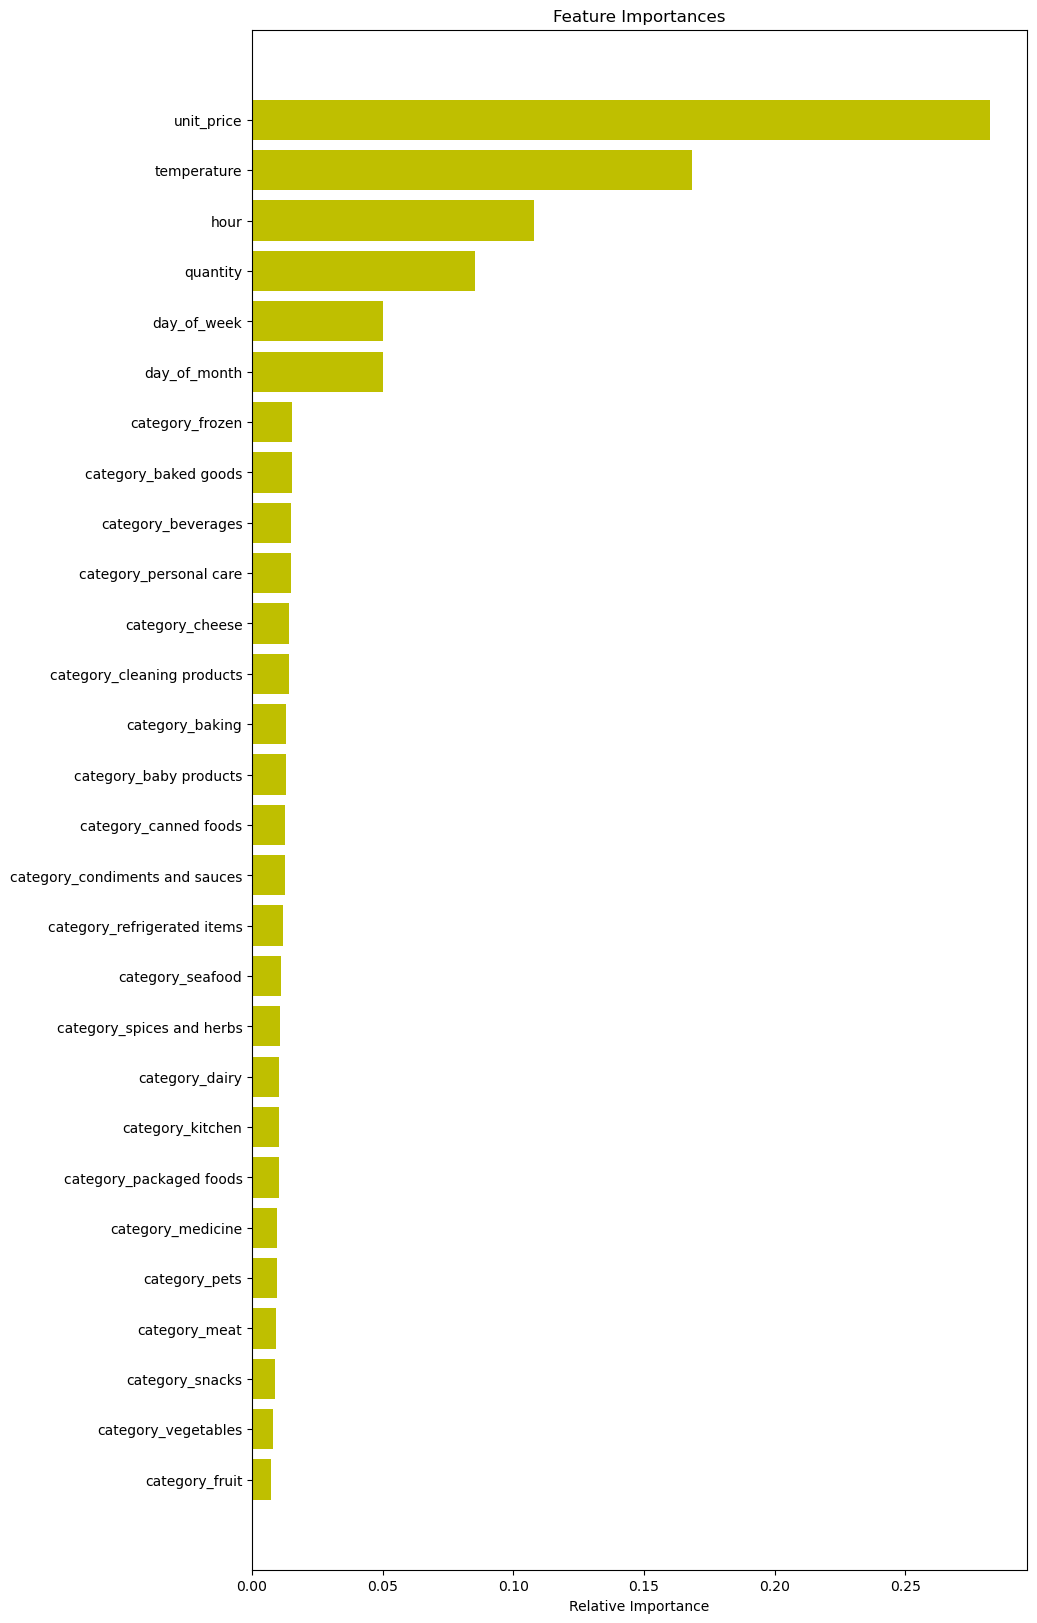

In [181]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()